In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Question 3 Preprocessing

In [3]:
caravan = pd.read_csv("Caravan.csv")
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


(a) Evaluate the variances of the first and the second variables.

In [4]:
questionA = caravan[['MOSTYPE', 'MAANTHUI']] # Select needed variables.
questionA.head()

,MOSTYPE,MAANTHUI
0,33,1
1,37,1
2,37,1
3,9,1
4,40,1


In [5]:
np.var(questionA) # Answer to Question 3 (a) variances

MOSTYPE     165.009500
MAANTHUI      0.164679
dtype: float64

In [6]:
np.mean(questionA)

C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


MOSTYPE     24.253349
MAANTHUI     1.110615
dtype: float64

From the variables we could see that, the variances between different variables are quite different from each other. As we will use euclidean distance for KNN classification, those variables with larger variance will outweigh those variables with small variance. Thus, in order to reduce bias and enhance accuracy, we need to scale all these variables before training. 

(b) Scale the training data and use the same sample mean and standard deviation (for each variable) to scale the test data. 

In [7]:
testXCaravan = caravan.iloc[:1000,0:85] # Split and get the test data set.
testYCaravan = caravan.iloc[:1000,85:86]
testYCaravan

,Purchase
0,No
1,No
2,No
3,No
4,No
...,...
995,No
996,No
997,No
998,No


In [8]:
trainXCaravan = caravan.iloc[1000:5822,0:85] # Split and get the train data set.
trainYCaravan = caravan.iloc[1000:5822,85:86]
trainXCaravan = trainXCaravan.reset_index(drop = True)
trainYCaravan = trainYCaravan.reset_index(drop = True)

In [9]:
trainXCaravan.describe(include = "all")

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,...,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000
mean,24.226877,1.110742,2.679179,2.994608,5.768146,0.698051,4.616964,1.077146,3.261510,6.178349,...,0.077561,0.004562,0.006014,0.004562,0.563459,0.000415,0.005392,0.033803,0.008088,0.013687
std,12.816577,0.401424,0.790512,0.817241,2.851681,0.994526,1.709420,1.016693,1.590213,1.904733,...,0.367468,0.067398,0.077325,0.076073,0.561520,0.020364,0.076019,0.219128,0.091864,0.116201
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,8.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,4.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,1.000000


In [10]:
mean = trainXCaravan.mean() # Get the mean value of train set.
mean

MOSTYPE     24.226877
MAANTHUI     1.110742
MGEMOMV      2.679179
MGEMLEEF     2.994608
MOSHOOFD     5.768146
              ...    
AZEILPL      0.000415
APLEZIER     0.005392
AFIETS       0.033803
AINBOED      0.008088
ABYSTAND     0.013687
Length: 85, dtype: float64

In [11]:
std = trainXCaravan.std() # Get the standard deviation of train set.
std

MOSTYPE     12.816577
MAANTHUI     0.401424
MGEMOMV      0.790512
MGEMLEEF     0.817241
MOSHOOFD     2.851681
              ...    
AZEILPL      0.020364
APLEZIER     0.076019
AFIETS       0.219128
AINBOED      0.091864
ABYSTAND     0.116201
Length: 85, dtype: float64

In [12]:
trainXCaravan = (trainXCaravan-mean)/std # Scale train data set.
trainXCaravan

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,1.230681,-0.275874,2.935845,0.006598,1.483986,0.303611,-2.115901,3.858443,-0.164450,1.481389,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
1,0.138346,-0.275874,-2.124165,2.453858,0.081304,-0.701893,-0.360920,0.907701,0.464397,-1.668659,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
2,-1.110037,-0.275874,1.670842,-1.217032,-0.970707,1.309116,0.809067,-1.059460,-0.164450,-0.093635,...,-0.211069,-0.067693,-0.077777,-0.059974,-1.003454,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
3,1.074634,-0.275874,-0.859163,-1.217032,1.133315,-0.701893,-0.360920,0.907701,0.464397,0.431373,...,-0.211069,-0.067693,-0.077777,-0.059974,-1.003454,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
4,1.152658,2.215255,0.405840,0.006598,1.133315,0.303611,0.224074,-1.059460,-0.164450,0.431373,...,-0.211069,-0.067693,-0.077777,-0.059974,-1.003454,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4817,0.918586,-0.275874,-2.124165,-1.217032,0.782645,-0.701893,0.809067,-0.075880,-0.793296,-2.718675,...,5.231584,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
4818,0.840562,-0.275874,1.670842,1.230228,0.782645,0.303611,-0.360920,-0.075880,0.464397,-0.093635,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
4819,0.684514,-0.275874,0.405840,1.230228,0.782645,-0.701893,0.809067,-1.059460,-0.164450,-0.618643,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
4820,0.762538,-0.275874,0.405840,-1.217032,0.782645,-0.701893,1.394061,-1.059460,-0.793296,0.431373,...,-0.211069,-0.067693,-0.077777,-0.059974,-1.003454,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789


In [13]:
testXCaravan = (testXCaravan-mean)/std # Scale test data set using the same mean and std.
testXCaravan

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.684514,-0.275874,0.405840,-1.217032,0.782645,-0.701893,0.224074,-0.075880,-0.164450,0.431373,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
1,0.996610,-0.275874,-0.859163,-1.217032,0.782645,0.303611,-0.360920,-0.075880,0.464397,-0.093635,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
2,0.996610,-0.275874,-0.859163,-1.217032,0.782645,-0.701893,-0.360920,0.907701,0.464397,-1.668659,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
3,-1.188061,-0.275874,0.405840,0.006598,-0.970707,1.309116,-0.945914,0.907701,0.464397,-0.618643,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
4,1.230681,-0.275874,1.670842,-1.217032,1.483986,0.303611,-0.360920,-0.075880,0.464397,0.431373,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.684514,-0.275874,-0.859163,1.230228,0.782645,1.309116,0.224074,-1.059460,-0.164450,1.481389,...,-0.211069,-0.067693,-0.077777,-0.059974,-1.003454,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
996,-1.812253,-0.275874,-0.859163,1.230228,-1.672047,-0.701893,-1.530907,-1.059460,2.350937,-0.093635,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,8.972828,-0.088042,-0.117789
997,0.684514,-0.275874,0.405840,0.006598,0.782645,0.303611,0.224074,-1.059460,-0.164450,0.431373,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789
998,-1.656205,-0.275874,-0.859163,1.230228,-1.672047,-0.701893,-0.360920,0.907701,0.464397,-0.618643,...,-0.211069,-0.067693,-0.077777,-0.059974,0.777428,-0.020368,-0.070929,-0.154263,-0.088042,-0.117789


(c) Apply KNN method with K = 3 to obtain the test misclassification error and output the classification table.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(trainXCaravan, trainYCaravan) # Train the model with K = 3.
y_true, y_pred = testYCaravan.to_numpy(), kNN.predict(testXCaravan) # Use the model we trained just now to fit on test data set.
confusion_matrix(y_true, y_pred) # Output the classification table (confusion matrix).

C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[920,  21],
       [ 53,   6]], dtype=int64)

In [15]:
(y_pred != y_true).mean() # Test misclassification error

0.082814

(d) Set seed as your matric number. Use valuation-set approach to determine the optimal K value with the training data only. The candidate values of K are {3, 4, . . . , 10}.

C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected

Text(0, 0.5, 'ErrTe')

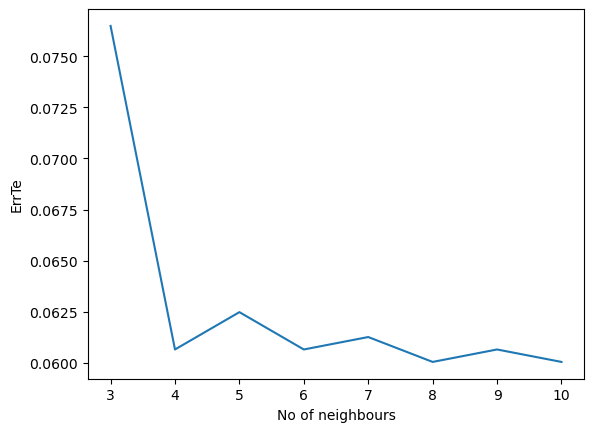

In [16]:
from sklearn.model_selection import train_test_split
seed = 2203441
n = len(caravan)
X_pdtrain, X_pdtest, y_pdtrain, y_pdtest = train_test_split(trainXCaravan, trainYCaravan, test_size=0.3, random_state=seed)
# Use the training data only.
ErrTe = []
Kmax = 10 # K starts from 3 and ends at 10.
for kk in range(3, Kmax+1):
    kNN = KNeighborsClassifier(n_neighbors=kk)
    kNN.fit(X_pdtrain, y_pdtrain)
    y_pred_VSA = kNN.predict(X_pdtest)
    y_pdtestarray = y_pdtest.to_numpy()
    ErrTe.append((y_pred_VSA != y_pdtestarray).mean())

import matplotlib.pyplot as plt 
import seaborn as sns
sns.lineplot(x = np.arange(3, Kmax+1), y = np.asarray(ErrTe))
plt.xlabel("No of neighbours")
plt.ylabel("ErrTe")

In [17]:
ErrTe

[0.07648357610460171,
 0.060651186426269064,
 0.06247800061992283,
 0.060651186426269064,
 0.06126012449082032,
 0.06004224836171781,
 0.060651186426269064,
 0.06004224836171781]

By comparing the above errors and graph, we could suggest that the optimal K value to be 8 or 10. This is because both K values have exactly the same ErrTe value. However, if we take consider of complexity, we should choose K = 10 as it is less complex.

(e) Set seed as your matric number minus one. Repeat part (d) and compare the results. Are they suggesting the same optimal K?

C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected

Text(0, 0.5, 'ErrTe')

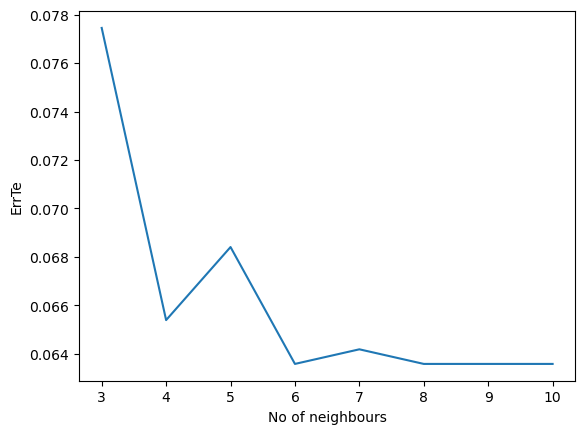

In [18]:
seed = 2203440
n = len(caravan)
X_pdtrain, X_pdtest, y_pdtrain, y_pdtest = train_test_split(trainXCaravan, trainYCaravan, test_size=0.3, random_state=seed)

ErrTe = []
Kmax = 10
for kk in range(3, Kmax+1):
    kNN = KNeighborsClassifier(n_neighbors=kk)
    kNN.fit(X_pdtrain, y_pdtrain)
    y_pred_VSA = kNN.predict(X_pdtest)
    y_pdtestarray = y_pdtest.to_numpy()
    ErrTe.append((y_pred_VSA != y_pdtestarray).mean())

import matplotlib.pyplot as plt 
import seaborn as sns
sns.lineplot(x = np.arange(3, Kmax+1), y = np.asarray(ErrTe))
plt.xlabel("No of neighbours")
plt.ylabel("ErrTe")

# Result is different due to the randomness in spliting despite using the same seed. This is the second time.

In [19]:
ErrTe

[0.07745357862154571,
 0.06538944096620083,
 0.06840547538003705,
 0.0635798203178991,
 0.06418302720066635,
 0.0635798203178991,
 0.0635798203178991,
 0.0635798203178991]

By comparing the above errors and graph, we could suggest that the optimal K value to be 8, 9 or 10. This is because all the three K values have exactly the same ErrTe value. This part is defferent from Question (d). However, if we take consider of complexity, we should choose K = 10 as it is less complex.

(f) Set seed as your matric number. Use 5-fold cross-validation approach to determine the optimal K value with the training data only. The candidate values of K are {3, 4, . . . , 10}.

In [20]:
from sklearn.model_selection import KFold
seed = 2203441
kf = KFold(5, random_state = seed, shuffle = True)
kf.get_n_splits(trainXCaravan)

5

In [21]:
# Cross validation
Kmax = 10
ErrCV = np.zeros((8,5))
f = 0

for f in range(0,5):
    result = next(kf.split(trainXCaravan), None)
    X_pdtrain, y_pdtrain = trainXCaravan.iloc[result[0]],trainYCaravan.iloc[result[0]]
    X_pdtest, y_pdtest = trainXCaravan.iloc[result[1]],trainYCaravan.iloc[result[1]]
    #Data Preprocessing on pdtrain and pdtest
    
    for kk in range(3, Kmax+1):
        kNN = KNeighborsClassifier(n_neighbors=kk)
        kNN.fit(X_pdtrain, y_pdtrain) 
        y_pred = kNN.predict(X_pdtest)
        y_pred = y_pred.reshape(965,1)
        ErrCV[kk-3, f] = (y_pred != y_pdtest).mean()
    f+=1

C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected

In [22]:
ErrCV

array([[0.07150259, 0.07150259, 0.07150259, 0.07150259, 0.07150259],
       [0.05595855, 0.05595855, 0.05595855, 0.05595855, 0.05595855],
       [0.05906736, 0.05906736, 0.05906736, 0.05906736, 0.05906736],
       [0.05492228, 0.05492228, 0.05492228, 0.05492228, 0.05492228],
       [0.05595855, 0.05595855, 0.05595855, 0.05595855, 0.05595855],
       [0.05492228, 0.05492228, 0.05492228, 0.05492228, 0.05492228],
       [0.05699482, 0.05699482, 0.05699482, 0.05699482, 0.05699482],
       [0.05595855, 0.05595855, 0.05595855, 0.05595855, 0.05595855]])

Text(0, 0.5, 'ErrTe')

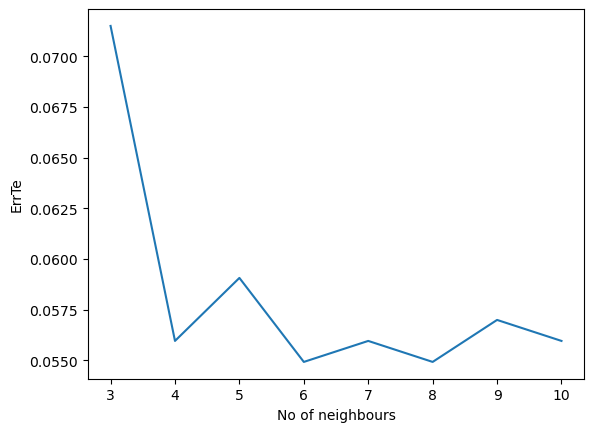

In [23]:
# Plot average CV error
sns.lineplot(x = np.arange(3, Kmax+1), y = ErrCV.mean(axis = 1))
plt.xlabel("No of neighbours")
plt.ylabel("ErrTe")

The optimal K value should be 6 or 8.

Question 4 Preprocessing

In [24]:
trainhouse = pd.read_csv("Houseprice.train.csv")
testhouse = pd.read_csv("Houseprice.test.csv")
trainhouse.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,...,OLDTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt.Qual,Sale.Price
0,-0.103508,0.652747,-0.512407,1.105669,1.021085,-1.013221,0.706831,-0.427355,-0.747345,1.348709,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.131871
1,-0.391477,-0.072527,1.289025,-1.700682,-1.691761,-1.013221,0.043788,-1.131789,-0.822185,0.576088,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.509136
2,0.050903,-0.797802,-0.512407,-0.564778,0.391317,-0.148361,-0.215566,1.340918,1.893435,-0.789421,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,0.118921
3,0.121010,-0.072527,-0.512407,-1.633864,-1.691761,-1.013221,1.430767,0.341772,0.110641,-0.789421,...,3.483094,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.722805
4,-0.245607,2.103297,-0.512407,1.139078,1.021085,0.805495,0.562496,1.328938,1.211857,-0.789421,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,7.812492,-0.152629,-0.091644,1.746467,1.801077


In [25]:
trainhouse.shape

(2035, 48)

In [26]:
testhouse.shape

(873, 48)

In [27]:
trainhouse.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr',
       'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV',
       'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NriddgHt', 'NWAmes',
       'OLDTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker', 'Bsmt.Qual', 'Sale.Price'],
      dtype='object')

(a) Fit a linear regression.

In [28]:
import statsmodels.api as sm
Y = trainhouse["Sale.Price"]
X = trainhouse.iloc[:,0:47]
modelLinear = sm.OLS(Y, X).fit()

In [29]:
print(modelLinear.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale.Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:56:03   Log-Likelihood:                -557.41
No. Observations:                2035   AIC:                             1209.
Df Residuals:                    1988   BIC:                             1473.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotArea           0.0877      0.009      9.368

In [30]:
modelLinear.params

LotArea          8.772432e-02
OverallQual      2.212696e-01
OverallCond      8.864046e-02
YearBuilt        1.707356e-01
YearRemodAdd     3.415484e-02
BsmtFinSF1       6.997094e-02
BsmtUnfSF       -6.366774e-02
TotalBsmtSF      1.448018e-01
X1stFlrSF        2.178463e-01
X2ndFlrSF        2.165004e-01
GrLivArea        1.290239e-01
FullBath        -1.503776e-02
HalfBath        -6.260891e-03
BedroomAbvGr    -7.507608e-02
TotRmsAbvGrd     3.363446e-02
Fireplaces       1.328261e-02
GarageCars       2.850572e-02
GarageArea       5.824282e-02
WoodDeckSF       2.351383e-02
OpenPorchSF      1.378557e-02
EnclosedPorch    7.485004e-03
Blmngtn         -9.893151e+06
Blueste         -4.558364e+06
BrDale          -1.014731e+07
BrkSide         -1.832578e+07
ClearCr         -1.279210e+07
CollgCr         -2.739309e+07
Crawfor         -1.666115e+07
Edwards         -2.318812e+07
Gilbert         -2.308931e+07
IDOTRR          -1.426961e+07
MeadowV         -1.039498e+07
Mitchel         -1.765414e+07
Names     

In [31]:
y_predLinear = modelLinear.predict(testhouse.iloc[:, :-1])
y_testLinear = testhouse.iloc[:, -1]
test_errLinear = sum((y_predLinear - y_testLinear)**2)
print("Test error:", test_errLinear) # Test prediction error for linear regression.

Test error: 128.14832285054018


(b) Fit a ridge regression, where the tuning parameter λ should be found by crossvalidation over a range of λ=seq(0,0.99,0.01).

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


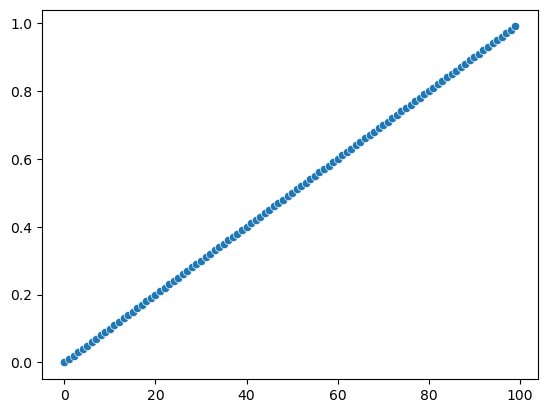

In [32]:
n,p = X.shape
n_points = 100
grid = np.arange(0, 1, 0.01) # Get a sequence of tuning parameter λ.
sns.scatterplot(x = np.arange(n_points), y = grid)
print(grid)

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
n_folds = 10
kf = KFold(n_folds, random_state = 2203441, shuffle = True)
kf.get_n_splits(X)

# Cross validation
mseCVRidge = np.zeros((100, n_folds))
f = 0
# Fit ridge regression with different λ value according to the sequence we obtained above.
for f in range(0,10):
    result = next(kf.split(X), None)
    X_train, Y_train = X.iloc[result[0]], Y.iloc[result[0]]
    X_cv, Y_cv= X.iloc[result[1]], Y.iloc[result[1]]
    
    for nn, lambda_ in enumerate(grid):
        ridge_mod = Ridge(alpha = lambda_, random_state = 2203441, max_iter = 100000)
        ridge_mod.fit(X_train, Y_train)
        y_pred = ridge_mod.predict(X_cv)
        mseCVRidge[nn, f] = mean_squared_error(Y_cv, y_pred)
    f += 1

C:\Users\ymlxl\AppData\Local\Temp\ipykernel_46724\844455598.py:1: RuntimeWarning: divide by zero encountered in log
  sns.scatterplot(x = np.log(grid), y = mseCVRidge.mean(axis = 1)) # Visualize the result.


Text(0, 0.5, 'Mean squared error')

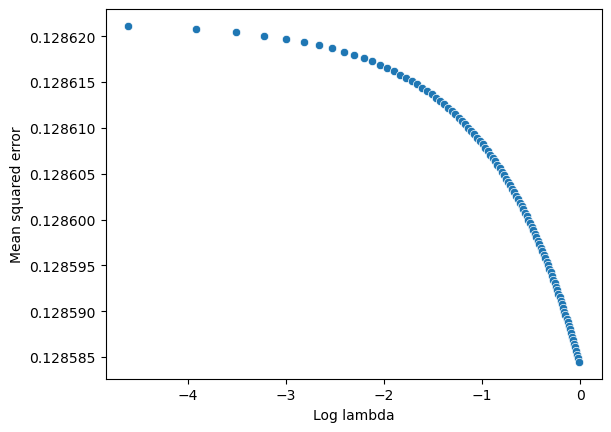

In [34]:
sns.scatterplot(x = np.log(grid), y = mseCVRidge.mean(axis = 1)) # Visualize the result.
plt.xlabel("Log lambda")
plt.ylabel("Mean squared error")

In [35]:
best_lambdaRidge = grid[np.argmin(mseCVRidge.mean(axis = 1))]
print("Best lambda is", best_lambdaRidge)

Best lambda is 0.0


In [36]:
ridge_mod = Ridge(alpha = best_lambdaRidge, random_state = 2203441, max_iter = 100000)
ridge_mod.fit(X, Y)
# Re-fit the model with the best λ we have just found.
print("Intercept:", ridge_mod.intercept_)
ridge_mod.coef_

Intercept: -873.765889579526


array([ 8.77243236e-02,  2.22897333e-01,  8.91456645e-02,  1.72419446e-01,
        3.01472623e-02,  6.77328935e-02, -6.70587319e-02,  1.49042120e-01,
        1.81124602e-01,  1.78453279e-01,  1.77759089e-01, -1.24666870e-02,
       -4.83026918e-03, -7.26334572e-02,  2.44102179e-02,  8.52506156e-03,
        2.84980674e-02,  6.09547364e-02,  2.45300219e-02,  1.50427534e-02,
        9.03206890e-03, -1.01591702e+12, -4.68093529e+11, -1.04201621e+12,
       -1.88185500e+12, -1.31360743e+12, -2.81296673e+12, -1.71091540e+12,
       -2.38116324e+12, -2.37101624e+12, -1.46533123e+12, -1.06744891e+12,
       -1.81288479e+12, -3.69977587e+12, -1.58521934e+12, -9.61500706e+11,
       -2.35055189e+12, -2.17791639e+12, -2.63606359e+12, -1.33359734e+12,
       -2.13200286e+12, -2.03635483e+12, -2.48924423e+12, -1.25157752e+12,
       -1.48311328e+12, -9.03679051e+11,  3.52516315e-02])

In [37]:
y_predRidge = ridge_mod.predict(testhouse.iloc[:, :-1])
y_testRidge = testhouse.iloc[:, -1]
test_errRidge = sum((y_predRidge - y_testRidge)**2)
print("Test error:", test_errRidge) # Test prediction error.

Test error: 128.89259794200532


In [38]:
mean_squared_error(y_testRidge, y_predRidge)

0.14764329661168998

(c) Fit a Lasso, where the tuning parameter λ should be found by cross-validation over a range of λ=seq(0,0.99,0.01).

In [39]:
from sklearn.linear_model import Lasso

# Cross validation
mseCVLasso = np.zeros((100, n_folds))
f = 0
# Fit a Lasso.
for f in range(0,10):
    result = next(kf.split(X), None)
    X_train, Y_train = X.iloc[result[0]], Y.iloc[result[0]]
    X_cv, Y_cv= X.iloc[result[1]], Y.iloc[result[1]]
    
    for nn, lambda_ in enumerate(grid):
        lasso_mod = Lasso(alpha = lambda_, random_state = 2203441, max_iter = 100000)
        lasso_mod.fit(X_train, Y_train)
        y_pred = lasso_mod.predict(X_cv)
        mseCVLasso[nn, f] = mean_squared_error(Y_cv, y_pred)
    f += 1

C:\Users\ymlxl\AppData\Local\Temp\ipykernel_46724\446310985.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_mod.fit(X_train, Y_train)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.031e+01, tolerance: 1.859e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_c

C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.031e+01, tolerance: 1.859e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ymlxl\AppData\Local\Temp\ipykernel_46724\446310985.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_mod.fit(X_train, Y_train)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_c

C:\Users\ymlxl\AppData\Local\Temp\ipykernel_46724\2899304924.py:1: RuntimeWarning: divide by zero encountered in log
  sns.scatterplot(x = np.log(grid), y = mseCVLasso.mean(axis = 1)) # Visualize the result.


Text(0, 0.5, 'Mean squared error')

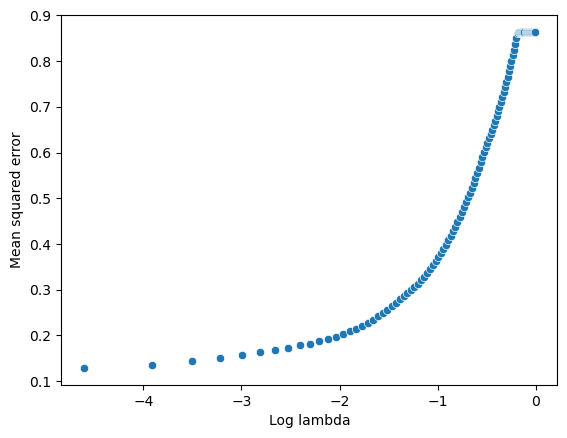

In [40]:
sns.scatterplot(x = np.log(grid), y = mseCVLasso.mean(axis = 1)) # Visualize the result.
plt.xlabel("Log lambda")
plt.ylabel("Mean squared error")

In [41]:
best_lambdaLasso = grid[np.argmin(mseCVLasso.mean(axis = 1))]
print("Best lambda is", best_lambdaLasso)

Best lambda is 0.0


In [42]:
lasso_mod = Lasso(alpha = best_lambdaLasso, random_state = 2203441, max_iter = 100000)
lasso_mod.fit(X, Y)

print("Intercept:", lasso_mod.intercept_)
lasso_mod.coef_

C:\Users\ymlxl\AppData\Local\Temp\ipykernel_46724\49591633.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_mod.fit(X, Y)
C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Intercept: 0.008508988856429056


C:\Users\ymlxl\.conda\envs\newenvt\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+02, tolerance: 2.035e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([ 0.08772432,  0.22126957,  0.08864046,  0.17073558,  0.03415485,
        0.06997095, -0.06366774,  0.14480181,  0.21784625,  0.21650039,
        0.12902392, -0.01503775, -0.00626087, -0.07507607,  0.03363445,
        0.01328263,  0.02850573,  0.05824284,  0.02351382,  0.01378559,
        0.00748499, -0.02133453, -0.01229846, -0.02235641,  0.02271839,
       -0.01392315, -0.01876411,  0.04199388, -0.00595432, -0.01413351,
        0.00638473, -0.01647329, -0.03233057, -0.03442187,  0.06204631,
       -0.02347854,  0.10638464, -0.04800728, -0.02283908, -0.00419754,
       -0.01480164, -0.0358292 ,  0.02212165,  0.05177773, -0.00062504,
       -0.00331503,  0.03527319])

In [43]:
y_predLasso = lasso_mod.predict(testhouse.iloc[:, :-1])
y_testLasso = testhouse.iloc[:, -1]
test_errLasso = sum((y_predLasso - y_testLasso)**2)
print("Test error:", test_errLasso) # Test prediction error.

Test error: 128.1483180747519


Question 5 Preprocessing

In [44]:
autotrain = pd.read_csv("Auto.train.csv")
autotest = pd.read_csv("Auto.test.csv")
autotrain.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,High,4,156.0,105,2800,14.4,80,1
1,Low,8,318.0,150,3940,13.2,76,1
2,High,4,121.0,80,2670,15.0,79,1
3,High,4,111.0,80,2155,14.8,77,1
4,Low,6,258.0,120,3410,15.1,78,1


In [45]:
X_autotrain = autotrain.iloc[:,1:8]
Y_autotrain = autotrain["mpg"]
X_autotest = autotest.iloc[:,1:8]
Y_autotest = autotest["mpg"]

In [46]:
X_autotrain.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [47]:
X_autotrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     353 non-null    int64  
 1   displacement  353 non-null    float64
 2   horsepower    353 non-null    int64  
 3   weight        353 non-null    int64  
 4   acceleration  353 non-null    float64
 5   year          353 non-null    int64  
 6   origin        353 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 19.4 KB


(a) Fit a logistic regression.

In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Fit with training data.
glm_fit = smf.glm("mpg~cylinders + displacement + horsepower + weight + acceleration + year + origin", data = autotrain, family=sm.families.Binomial()).fit()
print(glm_fit.summary())

                     Generalized Linear Model Regression Results                     
Dep. Variable:     ['mpg[High]', 'mpg[Low]']   No. Observations:                  353
Model:                                   GLM   Df Residuals:                      345
Model Family:                       Binomial   Df Model:                            7
Link Function:                         Logit   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -69.531
Date:                       Sun, 09 Apr 2023   Deviance:                       139.06
Time:                               20:05:21   Pearson chi2:                     331.
No. Iterations:                            8   Pseudo R-squ. (CS):             0.6292
Covariance Type:                   nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

In [49]:
glm_prob = glm_fit.predict(autotest) # Get the predictions on test data set.
glm_prob[:10]

0    8.850214e-07
1    7.627044e-01
2    4.529273e-07
3    7.121570e-01
4    1.277095e-02
5    2.454810e-02
6    6.367776e-01
7    9.831423e-01
8    7.314102e-01
9    8.807089e-05
dtype: float64

In [50]:
glm_pred = np.repeat("High", len(glm_prob)) # Map the result to a string (Categorical data).
glm_pred[glm_prob < 0.5] = "Low"
y_true = autotest["mpg"].values

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, glm_pred).T #  Compute the confusion matrix.

array([[20,  3],
       [ 2, 14]], dtype=int64)

In [52]:
(glm_pred == y_true).mean() #  Compute the overall fraction of correct predictions for the test data.

0.8717948717948718

(b) Fit a tree with pruning.

In [53]:
n_folds = 10 # Prepare for cross validation.
kf = KFold(n_folds, random_state = 2203441, shuffle = True)
kf.get_n_splits(X_autotrain)

10

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(random_state = 2203441, max_leaf_nodes = 13)
tree_class.fit(X_autotrain, Y_autotrain)
y_pred = tree_class.predict(X_autotrain)
# Build a basic regression tree without using cross validation.
features = X_autotrain.columns
feature_importance = tree_class.feature_importances_
print("Variables actually used in tree construction:\n", list(features[feature_importance != 0]))
print("Misclassification error rate: %s = %s/%s" %((y_pred != Y_autotrain).sum()/len(Y_autotrain), (y_pred != Y_autotrain).sum(), len(Y_autotrain)))

Variables actually used in tree construction:
 ['displacement', 'horsepower', 'weight', 'acceleration', 'year']
Misclassification error rate: 0.028328611898016998 = 10/353


[Text(0.6153846153846154, 0.95, 'displacement <= 190.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.493, 0.507]'),
 Text(0.46153846153846156, 0.85, 'horsepower <= 84.5\ngini = 0.244\nsamples = 55.8%\nvalue = [0.858, 0.142]'),
 Text(0.38461538461538464, 0.75, 'gini = 0.034\nsamples = 32.6%\nvalue = [0.983, 0.017]'),
 Text(0.5384615384615384, 0.75, 'year <= 78.5\ngini = 0.433\nsamples = 23.2%\nvalue = [0.683, 0.317]'),
 Text(0.46153846153846156, 0.65, 'weight <= 2775.0\ngini = 0.498\nsamples = 15.0%\nvalue = [0.528, 0.472]'),
 Text(0.3076923076923077, 0.55, 'displacement <= 88.5\ngini = 0.432\nsamples = 10.8%\nvalue = [0.684, 0.316]'),
 Text(0.23076923076923078, 0.45, 'gini = 0.0\nsamples = 0.8%\nvalue = [0.0, 1.0]'),
 Text(0.38461538461538464, 0.45, 'acceleration <= 18.0\ngini = 0.382\nsamples = 9.9%\nvalue = [0.743, 0.257]'),
 Text(0.3076923076923077, 0.35, 'acceleration <= 14.1\ngini = 0.305\nsamples = 9.1%\nvalue = [0.812, 0.188]'),
 Text(0.23076923076923078, 0.25, 'horsepower <= 111.5\

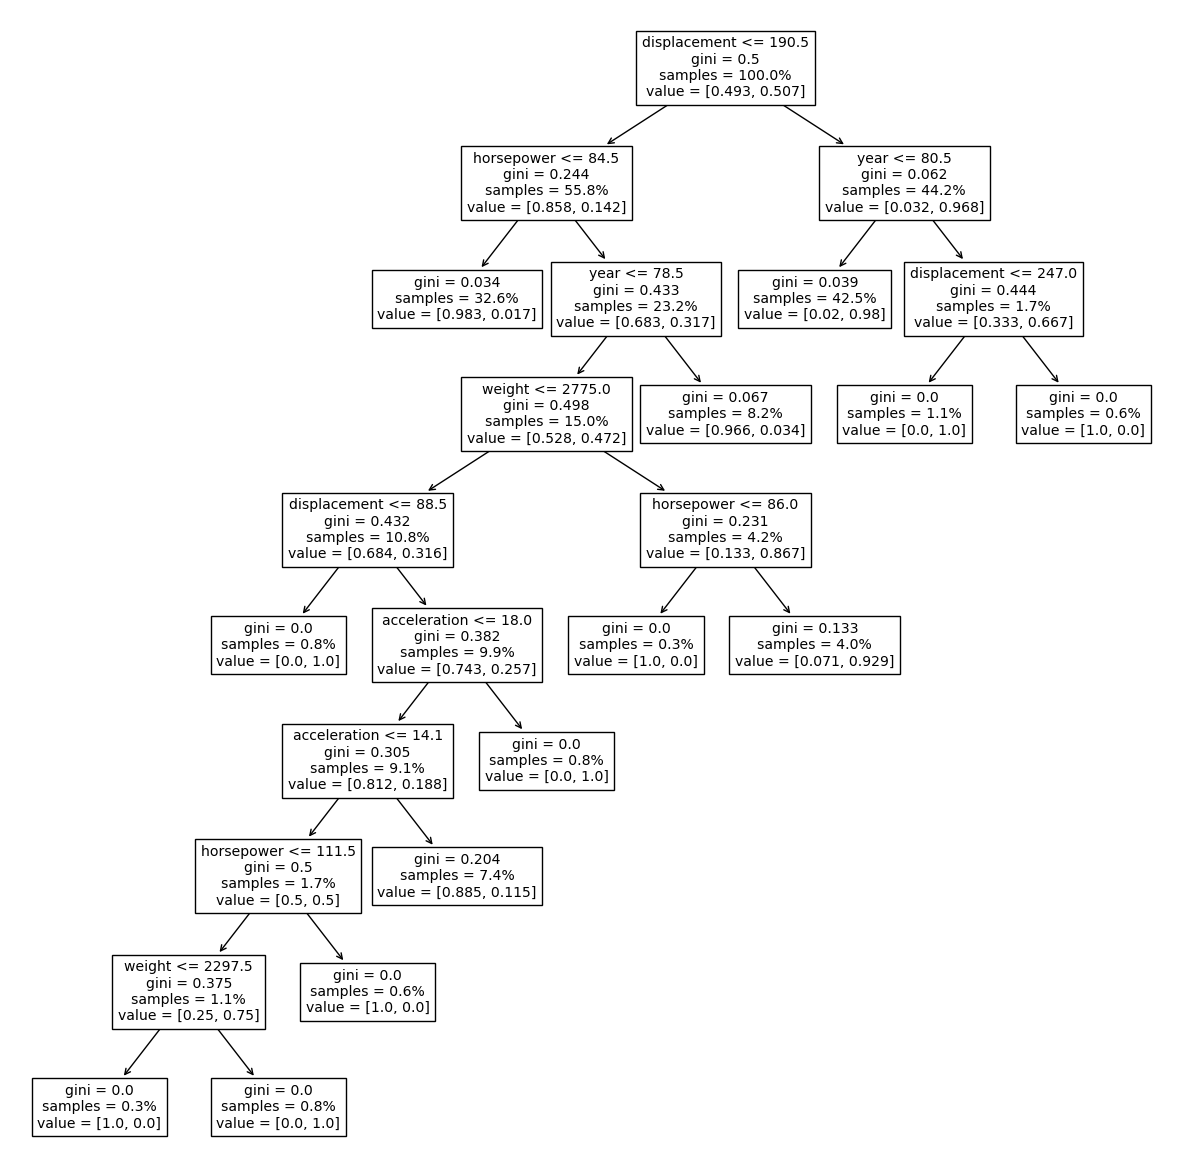

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,15)) # Plot the basic regression tree.
plot_tree(tree_class, feature_names = features, proportion = True)

In [56]:
# Cross validation: Use this method to find the best number of terminal nodes.
terminal_nodes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
n_nodes = len(terminal_nodes)
ErrCVTree = np.zeros((n_nodes, n_folds))
f = 0

for f in range(0,10):
    result = next(kf.split(X_autotrain), None)
    X_train, Y_train = X_autotrain.iloc[result[0]], Y_autotrain.iloc[result[0]]
    X_cv, Y_cv= X_autotrain.iloc[result[1]], Y_autotrain.iloc[result[1]]

    for nn, node in enumerate(terminal_nodes):
        try:
            tree_class = DecisionTreeClassifier(random_state = nn, max_leaf_nodes = node)
            tree_class.fit(X_train, Y_train)
            y_pred = tree_class.predict(X_cv)
            ErrCVTree[nn, f] = (y_pred != Y_cv).mean()
        except:
            ErrCVTree[nn, f] = 1
    f += 1
ErrCVTree = ErrCVTree.mean(axis = 1)

Text(0, 0.5, 'Misclassification error')

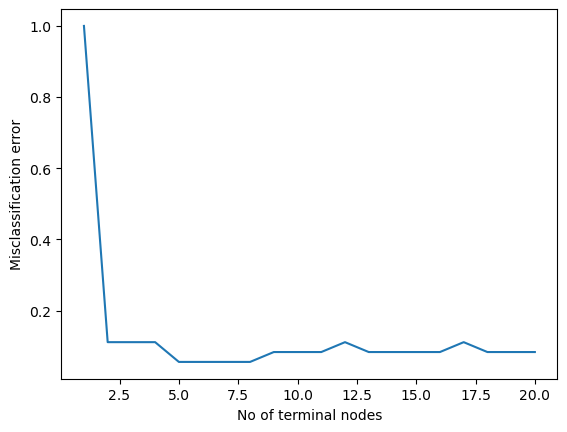

In [57]:
# Plot average CV error
sns.lineplot(x = terminal_nodes, y = ErrCVTree)
plt.xlabel("No of terminal nodes")
plt.ylabel("Misclassification error")

In [58]:
idx = np.argmin(ErrCVTree) # Find the optimal number of nodes.
cv_max_nodes = terminal_nodes[idx]
cv_max_nodes

5

In [59]:
prune_tree_class = DecisionTreeClassifier(random_state = idx, max_leaf_nodes = cv_max_nodes)
prune_tree_class.fit(X_autotrain, Y_autotrain)
y_pred = prune_tree_class.predict(X_autotest)
# Re-fit the model with pruning and directly get predictions on testing data.
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_autotest, y_pred) # Compute the confusion matrix.

array([[21,  1],
       [ 2, 15]], dtype=int64)

In [60]:
(y_pred == Y_autotest).mean() #  Compute the overall fraction of correct predictions for the test data.

0.9230769230769231

(c) Apply random forests with 500 bootstrapped trees and m =√p, where p is the number of predictors.

P = 7 in our case. Thus m = 3.

In [61]:
# Preprocess data.
Y_autotrain.replace(['Low', 'High'],[0, 1], inplace=True)
Y_autotest.replace(['Low', 'High'],[0, 1], inplace=True)
Y_autotrain

0      1
1      0
2      1
3      1
4      0
      ..
348    1
349    1
350    0
351    1
352    1
Name: mpg, Length: 353, dtype: int64

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_reg_bag = RandomForestRegressor(max_features = "sqrt", n_estimators = 500, random_state = 2203441, oob_score = True)
rf_reg_bag.fit(X_autotrain, Y_autotrain)
y_predrf = rf_reg_bag.predict(X_autotrain)
#Fit the model with training data using random forest regressor.
print("Mean of squared residuals:", mean_squared_error(Y_autotrain, y_predrf))

Mean of squared residuals: 0.006715342776203966


In [63]:
features = X_autotrain.columns
importances = rf_reg_bag.feature_importances_
print(pd.DataFrame({"Features":features, "Importance":importances}))

       Features  Importance
0     cylinders    0.202392
1  displacement    0.255837
2    horsepower    0.138284
3        weight    0.218231
4  acceleration    0.050173
5          year    0.094203
6        origin    0.040879


Text(0.5, 0, 'Gini importance')

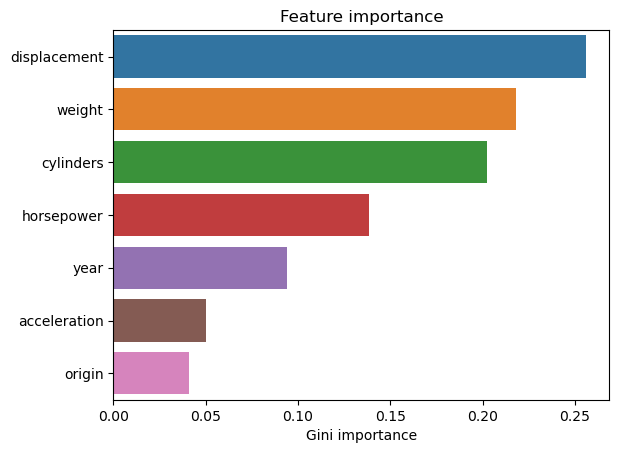

In [64]:
idx = np.argsort(importances)[::-1]

sns.barplot(x = importances[idx], y = features[idx])
plt.title("Feature importance")
plt.xlabel("Gini importance")

In [65]:
# Get predictions.
y_probrf = rf_reg_bag.predict(X_autotest)
y_predrf = np.repeat(1, len(y_probrf))
y_predrf[y_probrf < 0.5] = 0
y_true = autotest["mpg"].values
confusion_matrix(Y_autotest, y_predrf) # Compute the confusion matrix.

array([[15,  2],
       [ 2, 20]], dtype=int64)

In [66]:
(y_predrf == Y_autotest).mean() #  Compute the overall fraction of correct predictions for the test data.

0.8974358974358975

(d) Apply one boosting approach (AdaBoost, XGBoost, etc.) with 500 trees.

I choose to use AdaBoost here in my submission.

In [67]:
# Fit the model.
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=5)
ada_cls = AdaBoostClassifier(base_estimator, n_estimators = 500, random_state = 2203441)
ada_cls.fit(X_autotrain, Y_autotrain)
y_predAda = ada_cls.predict(X_autotrain)
print("In-sample confusion matrix:")
confusion_matrix(Y_autotrain, y_predAda) # Compute the confusion matrix on training data.

In-sample confusion matrix:


array([[179,   0],
       [  0, 174]], dtype=int64)

In [68]:
# Get predictions on test data.
y_predAda = ada_cls.predict(X_autotest)
cm = confusion_matrix(Y_autotest, y_predAda) # Compute the confusion matrix on training data.
print(cm)

[[15  2]
 [ 2 20]]


In [69]:
(y_predAda == Y_autotest).mean() #  Compute the overall fraction of correct predictions for the test data.

0.8974358974358975